In [1]:
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append('../')
import modules.network_classes as nc
import modules.utils as ut

In [2]:
# input_size = 7
# dataset = ut.n_hot_patterns(n=2,length=input_size)
# target = torch.eye(dataset.shape[0])

input_size = 21
dataset = torch.eye(input_size)
target = torch.eye(dataset.shape[0])
index = torch.arange(21)

ds = [x for x in zip(index,dataset,target)]
dataloader = DataLoader(ds, batch_size=1, shuffle=True)

epochs=100
seed=42

100%|██████████| 100/100 [00:01<00:00, 75.46it/s]
../modules/utils.py:309: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
../modules/utils.py:317: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


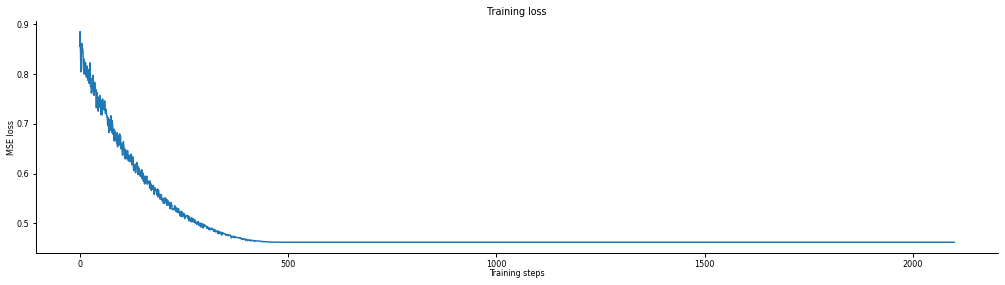

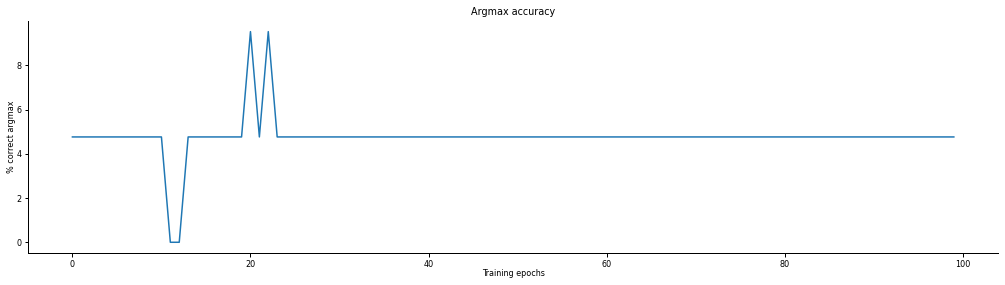

In [3]:
network_config = ut.read_from_yaml('../config/EIANN_1_hidden_backprop_softplus_Adam_config.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = nc.EIANN(layer_config, projection_config, seed=seed, **training_kwargs)

network.train(dataloader, epochs, store_history=True, status_bar=True)

loss_history, epoch_argmax_accuracy = ut.analyze_EIANN_loss(network, target, supervised=True, plot=True)
# ut.test_EIANN_config(network, dataset, target, epochs)

In [4]:
network.layers

{'Input': <class 'modules.network_classes.Layer'> :
 	(E),
 'H1': <class 'modules.network_classes.Layer'> :
 	(E, FBI),
 'Output': <class 'modules.network_classes.Layer'> :
 	(E, FBI)}

In [5]:
population = network.Output.E

for proj in population:
    print(proj)

Linear(in_features=7, out_features=21, bias=False)
Linear(in_features=7, out_features=21, bias=False)


In [6]:
population.H1.E.weight_history_ls.shape

torch.Size([2101, 21, 7])